In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from helper import convert_to_time

## LOAD THE DATA

In [3]:
np.random.seed(1)

# Default values
filename = 'TOTAL_KSI_6386614326836635957.csv'
input_directory = '../data/'
output_directory = './output/'

ksi_df = pd.read_csv(f'{input_directory}{filename}')


In [4]:
print(ksi_df.describe())


           OBJECTID         INDEX        ACCNUM          TIME      LATITUDE  \
count  18957.000000  1.895700e+04  1.402700e+04  18957.000000  18957.000000   
mean    9479.000000  3.994181e+07  5.576714e+08   1364.956428     43.710299   
std     5472.558862  3.749731e+07  1.180026e+09    631.310388      0.056294   
min        1.000000  3.363207e+06  2.530100e+04      0.000000     43.589678   
25%     4740.000000  5.408154e+06  1.034561e+06    924.000000     43.661727   
50%     9479.000000  7.820656e+06  1.220029e+06   1450.000000     43.702346   
75%    14218.000000  8.092292e+07  1.386958e+06   1852.000000     43.755945   
max    18957.000000  8.180752e+07  4.008024e+09   2359.000000     43.855445   

          LONGITUDE    FATAL_NO              x             y  
count  18957.000000  870.000000   18957.000000  1.895700e+04  
mean     -79.396490   28.752874  629181.568576  4.840951e+06  
std        0.104484   17.657001    8364.337712  6.324585e+03  
min      -79.638390    1.000000  609

In [5]:
print(ksi_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18957 entries, 0 to 18956
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           18957 non-null  int64  
 1   INDEX              18957 non-null  int64  
 2   ACCNUM             14027 non-null  float64
 3   DATE               18957 non-null  object 
 4   TIME               18957 non-null  int64  
 5   STREET1            18957 non-null  object 
 6   STREET2            17251 non-null  object 
 7   OFFSET             3820 non-null   object 
 8   ROAD_CLASS         18471 non-null  object 
 9   DISTRICT           18728 non-null  object 
 10  LATITUDE           18957 non-null  float64
 11  LONGITUDE          18957 non-null  float64
 12  ACCLOC             13501 non-null  object 
 13  TRAFFCTL           18882 non-null  object 
 14  VISIBILITY         18933 non-null  object 
 15  LIGHT              18953 non-null  object 
 16  RDSFCOND           189

In [6]:
print(ksi_df.isnull().sum())

OBJECTID                 0
INDEX                    0
ACCNUM                4930
DATE                     0
TIME                     0
STREET1                  0
STREET2               1706
OFFSET               15137
ROAD_CLASS             486
DISTRICT               229
LATITUDE                 0
LONGITUDE                0
ACCLOC                5456
TRAFFCTL                75
VISIBILITY              24
LIGHT                    4
RDSFCOND                29
ACCLASS                  1
IMPACTYPE               27
INVTYPE                 16
INVAGE                   0
INJURY                8897
FATAL_NO             18087
INITDIR               5277
VEHTYPE               3487
MANOEUVER             7953
DRIVACT               9289
DRIVCOND              9291
PEDTYPE              15728
PEDACT               15730
PEDCOND              15711
CYCLISTYPE           18152
CYCACT               18155
CYCCOND              18157
PEDESTRIAN           11269
CYCLIST              16971
AUTOMOBILE            1727
M

In [7]:
ksi_df.head(3)

OBJECTID    INDEX    ACCNUM                  DATE  TIME       STREET1  \
0         1  3389067  893184.0  1/1/2006 10:00:00 AM   236  WOODBINE AVE   
1         2  3389068  893184.0  1/1/2006 10:00:00 AM   236  WOODBINE AVE   
2         3  3389069  893184.0  1/1/2006 10:00:00 AM   236  WOODBINE AVE   

       STREET2 OFFSET      ROAD_CLASS               DISTRICT  ...  REDLIGHT  \
0  O CONNOR DR    NaN  Major Arterial  Toronto and East York  ...       NaN   
1  O CONNOR DR    NaN  Major Arterial  Toronto and East York  ...       NaN   
2  O CONNOR DR    NaN  Major Arterial  Toronto and East York  ...       NaN   

   ALCOHOL DISABILITY HOOD_158 NEIGHBOURHOOD_158 HOOD_140  \
0      Yes        NaN       60  Woodbine-Lumsden       60   
1      Yes        NaN       60  Woodbine-Lumsden       60   
2      Yes        NaN       60  Woodbine-Lumsden       60   

       NEIGHBOURHOOD_140 DIVISION            x             y  
0  Woodbine-Lumsden (60)      D55  635468.3685  4.839881e+06  
1  Woodbine-Lumsden (60)      D55  635468.3685  4.839881e+06  
2  Woodbine-Lumsden (60)      D55  635468.3685  4.839881e+06  

[3 rows x 54 columns]

In [8]:
categorical_columns = ksi_df.select_dtypes(include=[object, 'category']).columns.tolist()
ksi_df[categorical_columns] = ksi_df[categorical_columns].apply(lambda col: col.str.upper())

for x in categorical_columns:
        print(f"\nUnique values in column {x}:")
        print(ksi_df[x].unique().tolist())


Unique values in column DATE:
['1/1/2006 10:00:00 AM', '1/2/2006 10:00:00 AM', '1/4/2006 10:00:00 AM', '1/6/2006 10:00:00 AM', '1/7/2006 10:00:00 AM', '1/8/2006 10:00:00 AM', '1/9/2006 10:00:00 AM', '1/10/2006 10:00:00 AM', '1/11/2006 10:00:00 AM', '1/14/2006 10:00:00 AM', '1/15/2006 10:00:00 AM', '1/17/2006 10:00:00 AM', '1/21/2006 10:00:00 AM', '1/22/2006 10:00:00 AM', '1/24/2006 10:00:00 AM', '1/27/2006 10:00:00 AM', '1/29/2006 10:00:00 AM', '2/2/2006 10:00:00 AM', '2/3/2006 10:00:00 AM', '2/7/2006 10:00:00 AM', '2/8/2006 10:00:00 AM', '2/11/2006 10:00:00 AM', '2/12/2006 10:00:00 AM', '2/13/2006 10:00:00 AM', '2/14/2006 10:00:00 AM', '2/15/2006 10:00:00 AM', '2/16/2006 10:00:00 AM', '2/19/2006 10:00:00 AM', '2/20/2006 10:00:00 AM', '2/21/2006 10:00:00 AM', '2/23/2006 10:00:00 AM', '2/24/2006 10:00:00 AM', '2/25/2006 10:00:00 AM', '2/26/2006 10:00:00 AM', '2/27/2006 10:00:00 AM', '2/28/2006 10:00:00 AM', '3/1/2006 10:00:00 AM', '3/6/2006 10:00:00 AM', '3/8/2006 10:00:00 AM', '3/11/2

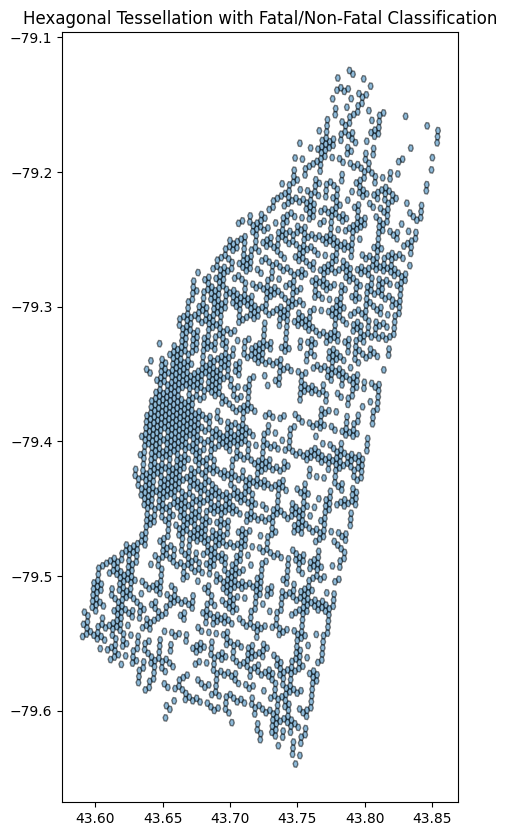

In [24]:
import geopandas as gpd
import pandas as pd
import h3
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon


# Convert data to a GeoDataFrame
df = pd.DataFrame(ksi_df)
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Step 1: Generate Hexagonal Tessellation using H3
resolution = 9  # H3 resolution (adjust for hexagon size)
hexagons = gdf['geometry'].apply(
    lambda x: h3.latlng_to_cell(x.y, x.x, resolution)
)

# Convert H3 hexagons to polygons for visualization
def h3_to_polygon(h3_index):
    boundary = h3.cell_to_boundary(h3_index)
    return Polygon(boundary)

gdf['Hexagon'] = hexagons
gdf['Hexagon_Polygon'] = gdf['Hexagon'].apply(h3_to_polygon)

# Step 2: Aggregate Data by Hexagon
hex_gdf = gdf.groupby('Hexagon').agg({
    'ACCLASS': lambda x: ', '.join(x),
    'Hexagon_Polygon': 'first'
}).reset_index()

# Create GeoDataFrame for hexagons
hex_gdf = gpd.GeoDataFrame(hex_gdf, geometry='Hexagon_Polygon')

# Step 3: Visualization
fig, ax = plt.subplots(figsize=(10, 10))
hex_gdf.plot(ax=ax, edgecolor='black', alpha=0.5)
gdf.plot(ax=ax, c=gdf['ACCLASS'].map({'Fatal': 'red', 'Non-Fatal Injury': 'green'}), markersize=10)
plt.title("Hexagonal Tessellation with Fatal/Non-Fatal Classification")
plt.show()


In [8]:
dropped_fields = [
    'INDEX',
    'ACCNUM',
    'OBJECTID',
    'STREET1',
    'STREET2',
    'DISTRICT',
    'LATITUDE',
    'LONGITUDE',
    'ACCLOC',
    'INVTYPE',
    'INVAGE',
    'INJURY',
    'OFFSET',
    'FATAL_NO',
    #'VEHTYPE',
    'INITDIR',
    'MANOEUVER',
    'DRIVACT',
    'DRIVCOND',
    'PEDTYPE',
    'PEDACT',
    'PEDCOND',
    'CYCLISTYPE',
    'CYCACT',
    'CYCCOND',
    'HOOD_158',
    'HOOD_140',
    'NEIGHBOURHOOD_140',
    'DIVISION',
    'x',
    'y',
]

In [9]:
categorical_columns = ksi_df.select_dtypes(include=[object, 'category']).columns.tolist()
numerical_columns = ksi_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Change all values to UpperCase
ksi_df[categorical_columns] = ksi_df[categorical_columns].apply(lambda col: col.str.upper())

#ksi_df.drop(['TIME'], inplace=True)


# Fields to be dropped depending on the dataset
#ksi_df.drop(dropped_fields, axis=1, inplace=True)

# Team agreed to drop the entry with missing label
ksi_df.dropna(subset=['ACCLASS'], inplace=True)

# Dropped ACCLASS with Property Damage : 10 Entries in the dataset 
#ksi_df.drop(ksi_df[ksi_df['ACCLASS'] == 'PROPERTY DAMAGE O'].index, inplace=True)
ksi_df['DATE'] = pd.to_datetime(ksi_df['DATE']).dt.month # Update date to per month
#ksi_df['DATE'] = pd.to_datetime(ksi_df['DATE'], format='%Y-%m')
ksi_df['TIME'] = ksi_df['TIME'].apply(convert_to_time)
ksi_df['TIME'] = pd.to_datetime(ksi_df['TIME']).dt.hour # Update time to per hour
ksi_df['ROAD_CLASS'] = ksi_df['ROAD_CLASS'].str.replace(r'MAJOR ARTERIAL ', 'MAJOR ARTERIAL', regex=False) # Update the incorrect Road Class with space

# Pedestrian and Passenger falls under 'Other' in INVTYPE
#df['VEHTYPE'] = np.where(((df['INVTYPE'] == 'Pedestrian') | (df['INVTYPE'] == 'Passenger')) & (df['VEHTYPE'] != '') , 'Other', df['INVTYPE'])

# Fill in empty fields for boolean columns
boolean_columns = [
    'PEDESTRIAN',
    'CYCLIST',
    'AUTOMOBILE',
    'MOTORCYCLE',
    'TRUCK',
    'TRSN_CITY_VEH',
    'EMERG_VEH',
    'PASSENGER',
    'SPEEDING',
    'AG_DRIV',
    'REDLIGHT',
    'ALCOHOL',
    'DISABILITY'
]
unknown_column = [
'VEHTYPE',
'TRAFFCTL'
]

other_column =  [
    'ROAD_CLASS',
    'VISIBILITY',
    'LIGHT',
    'RDSFCOND',
    'IMPACTYPE'
]

ksi_df[unknown_column] = ksi_df[unknown_column].fillna('Unknown')
ksi_df[other_column] = ksi_df[other_column].fillna('Other')
ksi_df[boolean_columns] = ksi_df[boolean_columns].fillna('No')

/var/folders/gg/llfmzrv17klb_smsmrvhnkzc0000gn/T/ipykernel_65949/667076471.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ksi_df['TIME'] = pd.to_datetime(ksi_df['TIME']).dt.hour # Update time to per hour


In [10]:
from sklearn.feature_selection import mutual_info_classif  
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from matplotlib.pyplot import figure

features = ksi_df.drop(columns=['ACCLASS'], axis=1)
target = ksi_df['ACCLASS']

# Instantiate SelectKBest with the chi2 scoring function and select top 20 features
k_value = 20
selector = SelectKBest(score_func=mutual_info_classif, k=k_value)

# Fit SelectKBest to the data and transform the feature matrix
X_new = selector.fit_transform(features, target)

# Print the shape of the transformed feature matrix
print(f"Transformed feature matrix shape: {X_new.shape}")

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
print(f"Indices of selected features: {selected_feature_indices}")

# Get the chi-squared scores for each feature
mi_scores = selector.scores_
print(f"Mutual Information scores for all features: {mi_scores}")


figure(figsize=(12, 8), dpi=80)
importances = mutual_info_classif(features, target)
feat_importances = pd.Series(importances, ksi_df.columns[0:len(ksi_df.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()
#mi_scores = mutual_info_classif(features, target)  
#print("Mutual Information Scores: ", mi_scores)

ValueError: could not convert string to float: 'WOODBINE AVE'

In [ ]:
# Check for variance
from sklearn.feature_selection import VarianceThreshold

# Set the threshold (e.g., 0.1 for this example)
selector = VarianceThreshold(threshold=0.1)

# Fit the selector to your data
selector.fit(features)

# Get the variances of each feature
variances = selector.variances_

# Identify features with low variance
low_variance_features = features.columns[selector.variances_ <= 0.5]

# Print the feature variances
variances

# Print the features with low variance
low_variance_features

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Binary mapping
binary_mapping = {'YES': 1, 'NO': 0}
target_mapping = {'FATAL': 1, 'NON-FATAL INJURY': 0, 'PROPERTY DAMAGE O': 2}
column_binary = [
    'PEDESTRIAN',
    'CYCLIST',
    'AUTOMOBILE',
    'MOTORCYCLE',
    'TRUCK',
    'TRSN_CITY_VEH',
    'EMERG_VEH',
    'PASSENGER',
    'SPEEDING',
    'AG_DRIV',
    'REDLIGHT',
    'ALCOHOL',
    'DISABILITY'
]
column_le = [
    'DATE',
    'ROAD_CLASS',
    'TRAFFCTL',
    'VISIBILITY',
    'LIGHT',
    'RDSFCOND',
    'IMPACTYPE',
    'VEHTYPE',
    'NEIGHBOURHOOD_158',
    'STREET1',
    'STREET2',
    'OFFSET',
    'DISTRICT',
    'ACCLOC',
    'INVTYPE',
    'INVAGE',
    'INJURY',
    'INITDIR',
    'MANOEUVER',
    'DRIVACT',
    'DRIVCOND',
    'PEDTYPE',
    'PEDACT',
    'PEDCOND',
    'CYCLISTYPE',
    'CYCACT',
    'CYCCOND',
    'HOOD_158',
    'HOOD_140',
    'NEIGHBOURHOOD_140',
    'DIVISION'
]

# Apply binary mapping using .loc
for column in column_binary:
    ksi_df[column] = ksi_df[column].map(lambda x: binary_mapping[x.upper()])

ksi_df['ACCLASS'] = ksi_df['ACCLASS'].replace(target_mapping)

le = LabelEncoder()

for column in column_le:
    ksi_df[column] = le.fit_transform(ksi_df
    [column])

In [ ]:
ksi_df['ACCLASS']
ksi_df['ACCLASS'] = ksi_df['ACCLASS'].astype(int)


In [ ]:
'''
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(ksi_df, y=column, hue='ACCLASS')
    #sns.swarmplot(ksi_df, x=column, hue='ACCLASS')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xscale('log')
    #plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

'''

In [ ]:
ksi_df.dropna(subset=['ACCNUM'], inplace=True)
ksi_df.drop(['FATAL_NO'], axis=1, inplace=True)
ksi_df.drop(['OBJECTID'], axis=1, inplace=True)
ksi_df.drop(['INDEX'], axis=1, inplace=True)
ksi_df.drop(['LATITUDE'], axis=1, inplace=True)
ksi_df.drop(['LONGITUDE'], axis=1, inplace=True)
ksi_df.dropna(how='any', inplace=True)


features = ksi_df.drop(columns=['ACCLASS'], axis=1)
target = ksi_df['ACCLASS']

print(ksi_df.info())

In [ ]:
ksi_df.head(5)

In [ ]:
ksi_df.shape

In [ ]:
features.head(5)

In [ ]:
ksi_df.isnull().sum()

In [ ]:
negative_counts = (ksi_df < 0).sum()
print(negative_counts)


In [ ]:
# Instantiate SelectKBest with the chi2 scoring function and select top 20 features
k_value = 20
selector = SelectKBest(score_func=chi2, k=k_value)

# Fit SelectKBest to the data and transform the feature matrix
X_new = selector.fit_transform(features, target)

# Print the shape of the transformed feature matrix
print(f"Transformed feature matrix shape: {X_new.shape}")

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
print(f"Indices of selected features: {selected_feature_indices}")

# Get the chi-squared scores for each feature
chi2_scores = selector.scores_
print(f"Chi-squared scores for all features: {chi2_scores}")

In [ ]:
features.columns[selected_feature_indices]

In [2]:
hood_id_158 = {"West Humber-Clairville":1,"Mount Olive-Silverstone-Jamestown":2,"Thistletown-Beaumond Heights":3,"Rexdale-Kipling":4,"Elms-Old Rexdale":5,"Kingsview Village-The Westway":6,"Willowridge-Martingrove-Richview":7,"Humber Heights-Westmount":8,"Edenbridge-Humber Valley":9,
"Princess-Rosethorn":10,"Eringate-Centennial-West Deane":11,"Markland Wood":12,"Etobicoke West Mall":13,"Kingsway South":15,"Stonegate-Queensway":16,"New Toronto":18,"Long Branch":19,"Alderwood":20,"Humber Summit":21,"Humbermede":22,"Pelmo Park-Humberlea":23,
"Black Creek":24,"Glenfield-Jane Heights":25,"York University Heights":27,"Rustic":28,"Maple Leaf":29,"Brookhaven-Amesbury":30,"Yorkdale-Glen Park":31,"Englemount-Lawrence":32,"Clanton Park":33,"Bathurst Manor":34,"Westminster-Branson":35,"Newtonbrook West":36,
"Willowdale West":37,"Lansing-Westgate":38,"Bedford Park-Nortown":39,"St.Andrew-Windfields":40,"Bridle Path-Sunnybrook-York Mills":41,"Banbury-Don Mills":42,"Victoria Village":43,"Flemingdon Park":44,"Pleasant View":46,"Don Valley Village":47,"Hillcrest Village":48,
"Bayview Woods-Steeles":49,"Newtonbrook East":50,"Bayview Village":52,"Henry Farm":53,"O'Connor-Parkview":54,"Thorncliffe Park":55,"Leaside-Bennington":56,"Broadview North":57,"Old East York":58,"Danforth East York":59,"Woodbine-Lumsden":60,"Taylor-Massey":61,
"East End-Danforth":62,"The Beaches":63,"Woodbine Corridor":64,"Greenwood-Coxwell":65,"Danforth":66,"Playter Estates-Danforth":67,"North Riverdale":68,"Blake-Jones":69,"South Riverdale":70,"Cabbagetown-South St.James Town":71,"Regent Park":72,"Moss Park":73,
"North St.James Town":74,"Kensington-Chinatown":78,"University":79,"Palmerston-Little Italy":80,"Trinity-Bellwoods":81,"Dufferin Grove":83,"Little Portugal":84,"South Parkdale":85,"Roncesvalles":86,"High Park-Swansea":87,"High Park North":88,"Runnymede-Bloor West Village":89,
"Junction Area":90,"Weston-Pelham Park":91,"Corso Italia-Davenport":92,"Wychwood":94,"Annex":95,"Casa Loma":96,"Yonge-St.Clair":97,"Rosedale-Moore Park":98,"Mount Pleasant East":99,"Yonge-Eglinton":100,"Forest Hill South":101,"Forest Hill North":102,"Lawrence Park South":103,
"Lawrence Park North":105,"Humewood-Cedarvale":106,"Oakwood Village":107,"Briar Hill-Belgravia":108,"Caledonia-Fairbank":109,"Keelesdale-Eglinton West":110,"Rockcliffe-Smythe":111,"Beechborough-Greenbrook":112,"Weston":113,"Lambton Baby Point":114,
"Mount Dennis":115,"Steeles":116,"Tam O'Shanter-Sullivan":118,"Wexford/Maryvale":119,"Clairlea-Birchmount":120,"Oakridge":121,"Birchcliffe-Cliffside":122,"Cliffcrest":123,"Kennedy Park":124,"Ionview":125,"Dorset Park":126,"Agincourt South-Malvern West":128,
"Agincourt North":129,"Milliken":130,"Centennial Scarborough":133,"Highland Creek":134,"Morningside":135,"West Hill":136,"Eglinton East":138,"Scarborough Village":139,"Guildwood":140,"Golfdale-Cedarbrae-Woburn":141,"Woburn North":142,
"West Rouge":143,"Morningside Heights":144,"Malvern West":145,"Malvern East":146,"L'Amoreaux West":147,"East L'Amoreaux":148,"Parkwoods-O'Connor Hills":149,"Fenside-Parkwoods":150,"Yonge-Doris":151,"East Willowdale":152,"Avondale":153,"Oakdale-Beverley Heights":154,
"Downsview":155,"Bendale-Glen Andrew":156,"Bendale South":157,"Islington":158,"Etobicoke City Centre":159,"Mimico-Queensway":160,"Humber Bay Shores":161,"West Queen West":162,"Fort York-Liberty Village":163,"Wellington Place":164,"Harbourfront-CityPlace":165,
"St Lawrence-East Bayfront-The Islands":166,"Church-Wellesley":167,"Downtown Yonge East":168,"Bay-Cloverhill":169,"Yonge-Bay Corridor":170,"Junction-Wallace Emerson":171,"Dovercourt Village":172,"North Toronto":173,"South Eglinton-Davisville":174,"NSA":0}

hood_id_140 = {"NSA":0,"West Humber-Clairville (1)":1,"Mount Olive-Silverstone-Jamestown (2)":2,"Thistletown-Beaumond Heights (3)":3,"Rexdale-Kipling (4)":4,"Elms-Old Rexdale (5)":5,"Kingsview Village-The Westway (6)":6,"Willowridge-Martingrove-Richview (7)":7,
"Humber Heights-Westmount (8)":8,"Edenbridge-Humber Valley (9)":9,"Princess-Rosethorn (10)":10,"Eringate-Centennial-West Deane (11)":11,"Markland Wood (12)":12,"Etobicoke West Mall (13)":13,"Islington-City Centre West (14)":14,"Kingsway South (15)":15,
"Stonegate-Queensway (16)":16,"Mimico (includes Humber Bay Shores) (17)":17,"New Toronto (18)":18,"Long Branch (19)":19,"Alderwood (20)":20,"Humber Summit (21)":21,"Humbermede (22)":22,"Pelmo Park-Humberlea (23)":23,"Black Creek (24)":24,"Glenfield-Jane Heights (25)":25,
"Downsview-Roding-CFB (26)":26,"York University Heights (27)":27,"Rustic (28)":28,"Maple Leaf (29)":29,"Brookhaven-Amesbury (30)":30,"Yorkdale-Glen Park (31)":31,"Englemount-Lawrence (32)":32,"Clanton Park (33)":33,"Bathurst Manor (34)":34,"Westminster-Branson (35)":35,
"Newtonbrook West (36)":36,"Willowdale West (37)":37,"Lansing-Westgate (38)":38,"Bedford Park-Nortown (39)":39,"St.Andrew-Windfields (40)":40,"Bridle Path-Sunnybrook-York Mills (41)":41,"Banbury-Don Mills (42)":42,"Victoria Village (43)":43,"Flemingdon Park (44)":44,
"Parkwoods-Donalda (45)":45,"Pleasant View (46)":46,"Don Valley Village (47)":47,"Hillcrest Village (48)":48,"Bayview Woods-Steeles (49)":49,"Newtonbrook East (50)":50,"Willowdale East (51)":51,"Bayview Village (52)":52,"Henry Farm (53)":53,"O'Connor-Parkview (54)":54,
"Thorncliffe Park (55)":55,"Leaside-Bennington (56)":56,"Broadview North (57)":57,"Old East York (58)":58,"Danforth East York (59)":59,"Woodbine-Lumsden (60)":60,"Taylor-Massey (61)":61,"East End-Danforth (62)":62,"The Beaches (63)":63,"Woodbine Corridor (64)":64,
"Greenwood-Coxwell (65)":65,"Danforth (66)":66,"Playter Estates-Danforth (67)":67,"North Riverdale (68)":68,"Blake-Jones (69)":69,"South Riverdale (70)":70,"Cabbagetown-South St.James Town (71)":71,"Regent Park (72)":72,"Moss Park (73)":73,"North St.James Town (74)":74,
"Church-Yonge Corridor (75)":75,"Bay Street Corridor (76)":76,"Waterfront Communities-The Island (77)":77,"Kensington-Chinatown (78)":78,"University (79)":79,"Palmerston-Little Italy (80)":80,"Trinity-Bellwoods (81)":81,"Niagara (82)":82,"Dufferin Grove (83)":83,
"Little Portugal (84)":84,"South Parkdale (85)":85,"Roncesvalles (86)":86,"High Park-Swansea (87)":87,"High Park North (88)":88,"Runnymede-Bloor West Village (89)":89,"Junction Area (90)":90,"Weston-Pellam Park (91)":91,"Corso Italia-Davenport (92)":92,"Dovercourt-Wallace Emerson-Junction (93)":93,
"Wychwood (94)":94,"Annex (95)":95,"Casa Loma (96)":96,"Yonge-St.Clair (97)":97,"Rosedale-Moore Park (98)":98,"Mount Pleasant East (99)":99,"Yonge-Eglinton (100)":100,"Forest Hill South (101)":101,"Forest Hill North (102)":102,"Lawrence Park South (103)":103,
"Mount Pleasant West (104)":104,"Lawrence Park North (105)":105,"Humewood-Cedarvale (106)":106,"Oakwood Village (107)":107,"Briar Hill-Belgravia (108)":108,"Caledonia-Fairbank (109)":109,"Keelesdale-Eglinton West (110)":110,"Rockcliffe-Smythe (111)":111,
"Beechborough-Greenbrook (112)":112,"Weston (113)":113,"Lambton Baby Point (114)":114,"Mount Dennis (115)":115,"Steeles (116)":116,"L'Amoreaux (117)":117,"Tam O'Shanter-Sullivan (118)":118,"Wexford/Maryvale (119)":119,"Clairlea-Birchmount (120)":120,"Oakridge (121)":121,
"Birchcliffe-Cliffside (122)":122,"Cliffcrest (123)":123,"Kennedy Park (124)":124,"Ionview (125)":125,"Dorset Park (126)":126,"Bendale (127)":127,"Agincourt South-Malvern West (128)":128,"Agincourt North (129)":129,"Milliken (130)":130,"Rouge (131)":131,"Malvern (132)":132,
"Centennial Scarborough (133)":133,"Highland Creek (134)":134,"Morningside (135)":135,"West Hill (136)":136,"Woburn (137)":137,"Eglinton East (138)":138,"Scarborough Village (139)":139,"Guildwood (140)":140}

hood_158_vs_140 = {"Woodbine-Lumsden":"Woodbine-Lumsden (60)",  "Woodbine Corridor":"Woodbine Corridor (64)","Kensington-Chinatown":"Kensington-Chinatown (78)","Dufferin Grove":"Dufferin Grove (83)","Don Valley Village":"Don Valley Village (47)", "Morningside Heights":"Rouge (131)",  
"St Lawrence-East Bayfront-The Islands":"Waterfront Communities-The Island (77)",  "Elms-Old Rexdale":"Elms-Old Rexdale (5)",  "Dorset Park":  "Dorset Park (126)","Agincourt North": "Agincourt North (129)", "Bendale South":"Bendale (127)",  "Victoria Village":"Victoria Village (43)",  
"Humbermede":"Humbermede (22)",  "Yonge-Eglinton":  "Yonge-Eglinton (100)","Runnymede-Bloor West Village":"Runnymede-Bloor West Village (89)",  "Lansing-Westgate":"Lansing-Westgate (38)",  "West Hill": "West Hill (136)", "Agincourt South-Malvern West":"Agincourt South-Malvern West (128)",  
"Annex":  "Annex (95)", "Wexford/Maryvale":"Wexford/Maryvale (119)",  "West Rouge":"Rouge (131)",  "Rosedale-Moore Park":"Rosedale-Moore Park (98)",  "Palmerston-Little Italy":  "Palmerston-Little Italy (80)","Mimico-Queensway":"Mimico (includes Humber Bay Shores) (17)",  
"Casa Loma": "Casa Loma (96)", "East L'Amoreaux": "L'Amoreaux (117)", "High Park North": "High Park North (88)", "West Humber-Clairville":"West Humber-Clairville (1)",  "Parkwoods-O'Connor Hills": "Parkwoods-Donalda (45)", "Ionview":"Ionview (125)",  "Danforth":  "Danforth (66)",
"O'Connor-Parkview":  "O'Connor-Parkview (54)","Keelesdale-Eglinton West": "Keelesdale-Eglinton West (110)", "Danforth East York": "Danforth East York (59)", "Rexdale-Kipling": "Rexdale-Kipling (4)", "Dovercourt Village": "Dovercourt-Wallace Emerson-Junction (93)", 
"Leaside-Bennington": "Leaside-Bennington (56)", "South Parkdale":  "South Parkdale (85)","Malvern West": "Malvern (132)", "Etobicoke City Centre": "Markland Wood (12)", "Forest Hill South":  "Forest Hill South (101)","Eringate-Centennial-West Deane": "Eringate-Centennial-West Deane (11)", 
"Moss Park": "Moss Park (73)", "South Riverdale": "South Riverdale (70)", "Eglinton East":"Eglinton East (138)",  "Broadview North": "Broadview North (57)", "High Park-Swansea":  "High Park-Swansea (87)","Humber Bay Shores":  "Mimico (includes Humber Bay Shores) (17)",
"Malvern East": "Malvern (132)", "Kennedy Park": "Eglinton East (138)", "Trinity-Bellwoods":  "Trinity-Bellwoods (81)","Kingsview Village-The Westway":  "Kingsview Village-The Westway (6)","Steeles":"Steeles (116)",  "Junction-Wallace Emerson": "Dovercourt-Wallace Emerson-Junction (93)", 
"East Willowdale": "Willowdale East (51)", "York University Heights":  "York University Heights (27)","Weston-Pelham Park": "Weston-Pellam Park (91)", "NSA": "NSA",  "Woburn North": "Woburn (137)", "Brookhaven-Amesbury":"Rustic (28)",  "Maple Leaf":"Maple Leaf (29)",  
"Rockcliffe-Smythe":  "Rockcliffe-Smythe (111)","Corso Italia-Davenport":"Corso Italia-Davenport (92)",  "Mount Dennis": "Mount Dennis (115)", "Harbourfront-CityPlace":"Waterfront Communities-The Island (77)",  "Flemingdon Park": "Flemingdon Park (44)", "Banbury-Don Mills":  "Banbury-Don Mills (42)",
"Yonge-Bay Corridor": "Bay Street Corridor (76)", "Englemount-Lawrence":"Englemount-Lawrence (32)",  "Scarborough Village":"Scarborough Village (139)",  "Bay-Cloverhill":  "Church-Yonge Corridor (75)","Glenfield-Jane Heights":"Glenfield-Jane Heights (25)",  "Clairlea-Birchmount":"Clairlea-Birchmount (120)",  
"Brookhaven-Amesbury":"Maple Leaf (29)",  "Lawrence Park South":"Lawrence Park South (103)",  "Bedford Park-Nortown":  "Bedford Park-Nortown (39)","Birchcliffe-Cliffside": "Birchcliffe-Cliffside (122)", "Etobicoke City Centre": "Islington-City Centre West (14)", 
"Forest Hill North":  "Forest Hill North (102)","Humber Summit":"Humber Summit (21)",  "Beechborough-Greenbrook":  "Beechborough-Greenbrook (112)","Willowdale West": "Willowdale West (37)", "Greenwood-Coxwell":  "Greenwood-Coxwell (65)","St.Andrew-Windfields":  "St.Andrew-Windfields (40)",
"Edenbridge-Humber Valley": "Edenbridge-Humber Valley (9)", "Mount Pleasant East":"Mount Pleasant East (99)",  "Stonegate-Queensway":"Stonegate-Queensway (16)",  "Yonge-St.Clair":  "Yonge-St.Clair (97)","Humewood-Cedarvale": "Humewood-Cedarvale (106)", "Oakdale-Beverley Heights": "Downsview-Roding-CFB (26)", 
"Westminster-Branson":"Westminster-Branson (35)",  "Henry Farm":"Henry Farm (53)",  "Downtown Yonge East":"Church-Yonge Corridor (75)",  "Black Creek":  "Black Creek (24)","Humber Heights-Westmount": "Humber Heights-Westmount (8)", "Cabbagetown-South St.James Town":"Cabbagetown-South St.James Town (71)",  
"The Beaches":  "The Beaches (63)","Wychwood":  "Wychwood (94)","Morningside":  "Morningside (135)","Brookhaven-Amesbury":"Brookhaven-Amesbury (30)",  "South Eglinton-Davisville":"Mount Pleasant West (104)",  "West Queen West": "Niagara (82)", "Yonge-Doris":  "Willowdale East (51)",
"New Toronto":  "New Toronto (18)","Clanton Park": "Clanton Park (33)", "South Parkdale":  "Roncesvalles (86)","Princess-Rosethorn": "Princess-Rosethorn (10)", "Fenside-Parkwoods":  "Parkwoods-Donalda (45)","Oakwood Village": "Oakwood Village (107)", "Bendale-Glen Andrew":"Bendale (127)",  
"Bay-Cloverhill":  "Bay Street Corridor (76)","Wellington Place":"Waterfront Communities-The Island (77)",  "Little Portugal": "Little Portugal (84)", "Dufferin Grove":  "Dovercourt-Wallace Emerson-Junction (93)","Lambton Baby Point": "Lambton Baby Point (114)", "Old East York":"Old East York (58)",  
"Hillcrest Village":  "Hillcrest Village (48)","Avondale":  "Willowdale East (51)","Alderwood": "Alderwood (20)", "Taylor-Massey":"Taylor-Massey (61)",  "Newtonbrook East":"Newtonbrook East (50)",  "Cliffcrest":"Cliffcrest (123)",  "Caledonia-Fairbank": "Caledonia-Fairbank (109)", 
"Church-Wellesley":"Church-Yonge Corridor (75)",  "Palmerston-Little Italy":  "Annex (95)","Milliken":  "Milliken (130)","Greenwood-Coxwell":  "South Riverdale (70)","Bathurst Manor":  "Bathurst Manor (34)","Briar Hill-Belgravia":  "Briar Hill-Belgravia (108)","Fort York-Liberty Village":"Niagara (82)",  
"Milliken":  "NSA","Bayview Village": "Bayview Village (52)", "Pelmo Park-Humberlea":  "Pelmo Park-Humberlea (23)","Thorncliffe Park":"Thorncliffe Park (55)",  "Etobicoke West Mall":"Etobicoke West Mall (13)",  "Weston": "Weston (113)", "Willowridge-Martingrove-Richview":  "Willowridge-Martingrove-Richview (7)",
"Yorkdale-Glen Park": "Yorkdale-Glen Park (31)", "North Riverdale": "North Riverdale (68)", "Caledonia-Fairbank": "Briar Hill-Belgravia (108)", "Bendale South":"Woburn (137)",  "Roncesvalles": "Roncesvalles (86)", "Mount Olive-Silverstone-Jamestown": "Mount Olive-Silverstone-Jamestown (2)", 
"Tam O'Shanter-Sullivan":"Tam O'Shanter-Sullivan (118)",  "Thistletown-Beaumond Heights":"Thistletown-Beaumond Heights (3)",  "L'Amoreaux West": "L'Amoreaux (117)", "Regent Park":  "Regent Park (72)","Downsview": "Downsview-Roding-CFB (26)", "Bridle Path-Sunnybrook-York Mills": "Bridle Path-Sunnybrook-York Mills (41)", 
"Kennedy Park": "Kennedy Park (124)", "Guildwood": "Guildwood (140)", "Islington": "Islington-City Centre West (14)", "Lawrence Park North":"Lawrence Park North (105)",  "Rustic": "Rustic (28)", "Pleasant View":"Pleasant View (46)",  "Golfdale-Cedarbrae-Woburn":"Woburn (137)",  
"East End-Danforth":  "East End-Danforth (62)","Junction Area":"Junction Area (90)",  "University":"University (79)",  "Don Valley Village": "Hillcrest Village (48)", "Newtonbrook West":"Newtonbrook West (36)",  "Highland Creek":  "Highland Creek (134)","Trinity-Bellwoods":  "Palmerston-Little Italy (80)",
"Centennial Scarborough":"Centennial Scarborough (133)",  "Morningside Heights":"NSA",  "Danforth East York": "Old East York (58)", "Blake-Jones":  "Blake-Jones (69)","Oakridge":  "Oakridge (121)","Bayview Woods-Steeles": "Bayview Woods-Steeles (49)", "The Beaches":  "Woodbine Corridor (64)",
"Long Branch":  "Long Branch (19)","Bayview Village": "Bayview Woods-Steeles (49)", "East Willowdale": "Newtonbrook East (50)", "Kingsway South":  "Kingsway South (15)","Humbermede":"Humber Summit (21)",  "Mimico-Queensway":"Stonegate-Queensway (16)",  "Little Portugal": "Dufferin Grove (83)", 
"Markland Wood":"Markland Wood (12)",  "Birchcliffe-Cliffside": "Cliffcrest (123)", "Newtonbrook East":"NSA",  "Mimico-Queensway":"Islington-City Centre West (14)",  "Playter Estates-Danforth": "Playter Estates-Danforth (67)", "Banbury-Don Mills":  "St.Andrew-Windfields (40)",
"Wellington Place":"Kensington-Chinatown (78)",  "Oakwood Village": "Briar Hill-Belgravia (108)", "North St.James Town":"Rosedale-Moore Park (98)",  "Forest Hill North":  "Briar Hill-Belgravia (108)","Downsview": "York University Heights (27)", "Morningside Heights":"Malvern (132)",  
"West Humber-Clairville":"NSA",  "Eringate-Centennial-West Deane": "NSA", "The Beaches":  "East End-Danforth (62)","North St.James Town":"North St.James Town (74)",  "Kensington-Chinatown":  "University (79)","Lawrence Park South":"Lawrence Park North (105)","Glenfield-Jane Heights":"Black Creek (24)",  
"North Toronto":"Mount Pleasant West (104)",  "Tam O'Shanter-Sullivan":"L'Amoreaux (117)",  "St Lawrence-East Bayfront-The Islands":"Church-Yonge Corridor (75)",  "South Riverdale": "The Beaches (63)", "Clanton Park": "Bathurst Manor (34)", "Malvern West": "Rouge (131)", 
"Humber Summit":"NSA",  "Roncesvalles": "Little Portugal (84)", "Milliken":  "Rouge (131)","Milliken":  "Agincourt North (129)","Henry Farm":"Pleasant View (46)",  "High Park-Swansea":  "High Park North (88)","Woodbine Corridor":  "Danforth (66)","Princess-Rosethorn": "Willowridge-Martingrove-Richview (7)", 
"Moss Park": "Cabbagetown-South St.James Town (71)", "Markland Wood":"Etobicoke West Mall (13)",  "Tam O'Shanter-Sullivan":"Agincourt South-Malvern West (128)",  "NSA": "West Humber-Clairville (1)",  "Victoria Village":"Clairlea-Birchmount (120)",  "Clanton Park": "Downsview-Roding-CFB (26)", 
"Cabbagetown-South St.James Town":"North St.James Town (74)",  "Bayview Woods-Steeles": "NSA", "St Lawrence-East Bayfront-The Islands":"Moss Park (73)",  "Pelmo Park-Humberlea":  "Humbermede (22)","West Queen West": "Trinity-Bellwoods (81)", "Don Valley Village": "Bayview Village (52)", 
"Bay-Cloverhill":  "Annex (95)","Oakdale-Beverley Heights": "Humbermede (22)", "Bridle Path-Sunnybrook-York Mills": "St.Andrew-Windfields (40)", "Roncesvalles":"High Park North (88)"}

hood_id_158_upp = {key.upper(): value for key, value in hood_id_158.items()}
hood_id_140_upp = {key.upper(): value for key, value in hood_id_140.items()}
hood_158_vs_140_upp = {key.upper(): value.upper() for key, value in hood_158_vs_140.items()}

In [4]:
hood_id_158_upp['WEST HUMBER-CLAIRVILLE']

1

In [5]:
hood_158_vs_140_upp

{'WOODBINE-LUMSDEN': 'WOODBINE-LUMSDEN (60)',
 'WOODBINE CORRIDOR': 'DANFORTH (66)',
 'KENSINGTON-CHINATOWN': 'UNIVERSITY (79)',
 'DUFFERIN GROVE': 'DOVERCOURT-WALLACE EMERSON-JUNCTION (93)',
 'DON VALLEY VILLAGE': 'BAYVIEW VILLAGE (52)',
 'MORNINGSIDE HEIGHTS': 'MALVERN (132)',
 'ST LAWRENCE-EAST BAYFRONT-THE ISLANDS': 'MOSS PARK (73)',
 'ELMS-OLD REXDALE': 'ELMS-OLD REXDALE (5)',
 'DORSET PARK': 'DORSET PARK (126)',
 'AGINCOURT NORTH': 'AGINCOURT NORTH (129)',
 'BENDALE SOUTH': 'WOBURN (137)',
 'VICTORIA VILLAGE': 'CLAIRLEA-BIRCHMOUNT (120)',
 'HUMBERMEDE': 'HUMBER SUMMIT (21)',
 'YONGE-EGLINTON': 'YONGE-EGLINTON (100)',
 'RUNNYMEDE-BLOOR WEST VILLAGE': 'RUNNYMEDE-BLOOR WEST VILLAGE (89)',
 'LANSING-WESTGATE': 'LANSING-WESTGATE (38)',
 'WEST HILL': 'WEST HILL (136)',
 'AGINCOURT SOUTH-MALVERN WEST': 'AGINCOURT SOUTH-MALVERN WEST (128)',
 'ANNEX': 'ANNEX (95)',
 'WEXFORD/MARYVALE': 'WEXFORD/MARYVALE (119)',
 'WEST ROUGE': 'ROUGE (131)',
 'ROSEDALE-MOORE PARK': 'ROSEDALE-MOORE PARK (98